In [19]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [20]:
train_examples_path = "/Users/brunomiglioretto/puc/upar_challenge/data/PAR2025/training_set.txt"

df = pd.read_csv(train_examples_path)

color_map = {
    1: "black",
    2: "blue",
    3: "brown",
    4: "gray",
    5: "green",
    6: "orange",
    7: "pink",
    8: "purple",
    9: "red",
    10: "white",
    11: "yellow"
}

for value, color in color_map.items():
    df[color] = df["color"].apply(lambda x: "1" if x == value else "0")

df.drop("file", axis=1, inplace=True)
df.drop("color", axis=1, inplace=True)

/var/folders/c7/blttvyg51mj5b1hgp0brx4mh0000gn/T/ipykernel_68115/401417013.py:20: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[color] = df["color"].apply(lambda x: "1" if x == value else "0")
/var/folders/c7/blttvyg51mj5b1hgp0brx4mh0000g

In [21]:
df

,gender,bag,hat,black,blue,brown,gray,green,orange,pink,purple,red,white,yellow
1.jpg,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2.jpg,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3.jpg,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4.jpg,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5.jpg,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
internet_913_2.jpg,1,0,0,0,1,0,0,0,0,0,0,0,0,0
Video3_1262_1.jpg,0,0,1,0,1,0,0,0,0,0,0,0,0,0
internet_962_1.jpg,1,0,0,0,1,0,0,0,0,0,0,0,0,0
internet_967_1.jpg,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [22]:
counts = []

for column in df.columns:
    a = df[column].value_counts()
    print(column, a)
    counts.append([column, "0", a[0], abs(a[0] - a[1])])
    counts.append([column, "1", a[1], abs(a[0] - a[1])])

counts_df = pd.DataFrame(counts, columns=["Feature", "Class", "Count", "Difference"])
counts_df = counts_df.sort_values("Difference")
counts_df

gender gender
0    67436
1    26858
Name: count, dtype: int64
bag bag
0    62455
1    31839
Name: count, dtype: int64
hat hat
0    74352
1    19942
Name: count, dtype: int64
black black
1    52861
0    41433
Name: count, dtype: int64
blue blue
0    71863
1    22431
Name: count, dtype: int64
brown brown
0    93043
1     1251
Name: count, dtype: int64
gray gray
0    82287
1    12007
Name: count, dtype: int64
green green
0    92946
1     1348
Name: count, dtype: int64
orange orange
0    94086
1      208
Name: count, dtype: int64
pink pink
0    93931
1      363
Name: count, dtype: int64
purple purple
0    94021
1      273
Name: count, dtype: int64
red red
0    93442
1      852
Name: count, dtype: int64
white white
0    92556
1     1738
Name: count, dtype: int64
yellow yellow
0    93332
1      962
Name: count, dtype: int64


/var/folders/c7/blttvyg51mj5b1hgp0brx4mh0000gn/T/ipykernel_68115/365265880.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  counts.append([column, "0", a[0], abs(a[0] - a[1])])
/var/folders/c7/blttvyg51mj5b1hgp0brx4mh0000gn/T/ipykernel_68115/365265880.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  counts.append([column, "1", a[1], abs(a[0] - a[1])])
/var/folders/c7/blttvyg51mj5b1hgp0brx4mh0000gn/T/ipykernel_68115/365265880.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To

,Feature,Class,Count,Difference
6,black,0,52861,11428
7,black,1,41433,11428
2,bag,0,62455,30616
3,bag,1,31839,30616
0,gender,0,67436,40578
1,gender,1,26858,40578
8,blue,0,71863,49432
9,blue,1,22431,49432
4,hat,0,74352,54410
5,hat,1,19942,54410


/Users/brunomiglioretto/puc/upar_challenge/.venv/lib/python3.14t/site-packages/seaborn/_base.py:1447: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.plot_data[axis] = cat_data
/Users/brunomiglioretto/puc/upar_challenge/.venv/lib/python3.

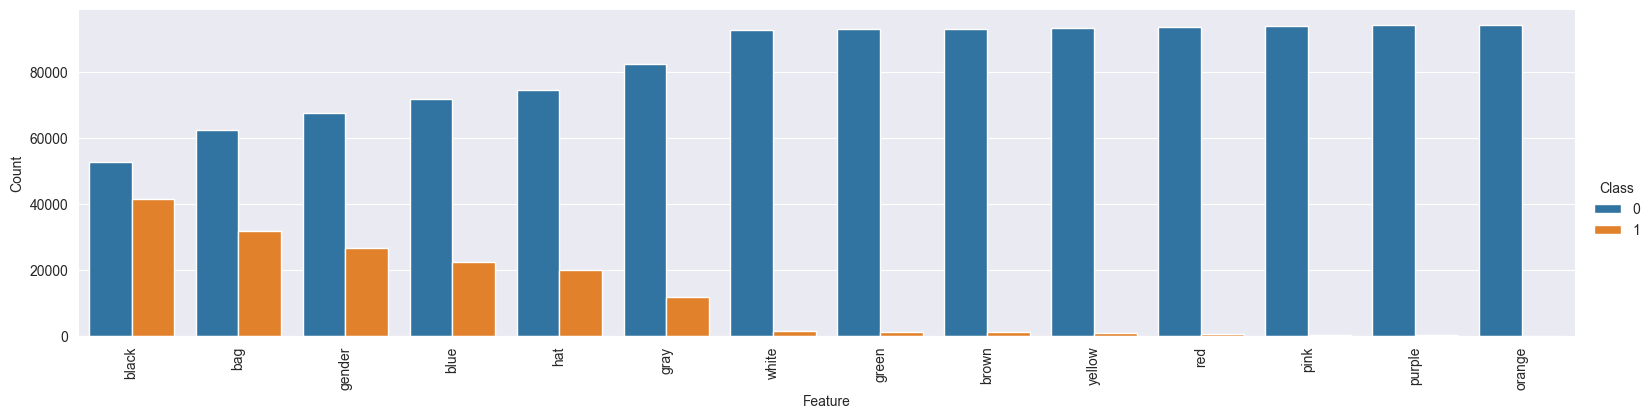

In [23]:
g = sns.catplot(
    data=counts_df,
    kind="bar",
    x="Feature",
    y="Count",
    hue="Class",
    height=4,
    aspect=4
)

g.set_xticklabels(rotation=90)

plt.show()